## (Ford GoBike System Data)

> This data contain the rides of bike in a bike-sharing system in an Francisco Bay area.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### load the Dataset

In [ ]:
#load the data
df=pd.read_csv("/content/201902-fordgobike-tripdata.csv")
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [ ]:
#get the shape of the data
df.shape

(183412, 16)

In [ ]:
#get info about nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [ ]:
#get data statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Cleaning


In [ ]:
#copy the dataset
b=df.copy()
b.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [ ]:
b['Age']=2022-b['member_birth_year']
b['Age']

0         38.0
1          NaN
2         50.0
3         33.0
4         48.0
          ... 
183407    26.0
183408    38.0
183409    32.0
183410    34.0
183411    33.0
Name: Age, Length: 183412, dtype: float64

In [ ]:
b.duplicated().sum()

0

In [ ]:
b.dropna(inplace=True)
b.shape

(174952, 17)

In [ ]:
b.isnull().sum().sum()

0

In [ ]:
#b['bike_id']=b.bike_id.astype(int)

In [ ]:
#drop the member_birth year column
b.drop(['member_birth_year'],axis=1,inplace=True)
b.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1,inplace=True)
b.drop(['start_station_id','start_station_name','end_station_id','end_station_name'],axis=1,inplace=True)
b.head(3)

,duration_sec,start_time,end_time,bike_id,user_type,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,4902,Customer,Male,No,38.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,5905,Customer,Male,No,50.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,6638,Subscriber,Other,No,33.0


In [ ]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   bike_id                  174952 non-null  int64  
 4   user_type                174952 non-null  object 
 5   member_gender            174952 non-null  object 
 6   bike_share_for_all_trip  174952 non-null  object 
 7   Age                      174952 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.0+ MB


In [ ]:
#convert the data type from  object to date time

#Return Indexes formatted strings specified by date_format (day , month , hour)
#df['trip_month'] = df.start_time.dt.strftime('%b')
b['start_time']=pd.to_datetime(b['start_time'])
b['end_time']=pd.to_datetime(b['end_time'])

In [ ]:
b.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
bike_id                             int64
user_type                          object
member_gender                      object
bike_share_for_all_trip            object
Age                               float64
dtype: object

In [ ]:
# the data describe only february month in 2019

b['trip_month'] = b.start_time.dt.month_name()
b['trip_day'] = b.start_time.dt.day_name()
b['start_hour']= b.start_time.dt.hour
b['end_hour']= b.end_time.dt.hour
filt = b['start_hour' ]==0 
b.loc[filt,'start_hour']=24
filt2=b['end_hour' ]==0 
b.loc[filt2,'end_hour']=24
b['trip_hour']=abs(b['end_hour']-b['start_hour'])
b['trip_hour']

0          9
2          7
3         13
4          1
5          1
          ..
183407     0
183408     0
183409     0
183410     0
183411     0
Name: trip_hour, Length: 174952, dtype: int64

In [ ]:
b['trip_month'].unique()

array(['February'], dtype=object)

In [ ]:
#convert the Age and trip_hour data type to int
b['Age']=b['Age'].astype(int)
b['trip_hour']=b['trip_hour'].astype(int)

In [ ]:
b['trip_hour'].value_counts()
# 0 hours means less than one hour 

0     144338
1      29669
2        425
3        135
23       104
4         69
5         50
6         33
9         25
7         24
8         15
10        13
11        13
13         9
12         9
22         6
14         5
15         2
20         2
21         2
18         2
19         1
16         1
Name: trip_hour, dtype: int64

In [ ]:
b.drop(["start_time","end_time"],axis=1,inplace=True)
b

,duration_sec,bike_id,user_type,member_gender,bike_share_for_all_trip,Age,trip_month,trip_day,start_hour,end_hour,trip_hour
0,52185,4902,Customer,Male,No,38,February,Thursday,17,8,9
2,61854,5905,Customer,Male,No,50,February,Thursday,12,5,7
3,36490,6638,Subscriber,Other,No,33,February,Thursday,17,4,13
4,1585,4898,Subscriber,Male,Yes,48,February,Thursday,23,24,1
5,1793,5200,Subscriber,Male,No,63,February,Thursday,23,24,1
...,...,...,...,...,...,...,...,...,...,...,...
183407,480,4832,Subscriber,Male,No,26,February,Friday,24,24,0
183408,313,4960,Subscriber,Male,No,38,February,Friday,24,24,0
183409,141,3824,Subscriber,Male,Yes,32,February,Friday,24,24,0
183410,139,5095,Subscriber,Male,No,34,February,Friday,24,24,0


### What is the structure of the dataset?

> rows = 174952  <br>
  features = 10

### What are the main features of interest in the dataset?

> ***The main feture is :*** <br>
>- trip_hour
>- trip_day
>- gender
>- user_type
>- Age

## Univariate Exploration
> 

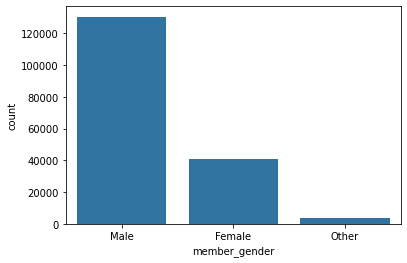

In [ ]:
#  gender
base_color=sb.color_palette()[0]
freq=b['member_gender'].value_counts()
sb.countplot(data=b,x='member_gender',color=base_color,order=freq.index)

# in a bike-sharing system, the number of the males are more than females and others 

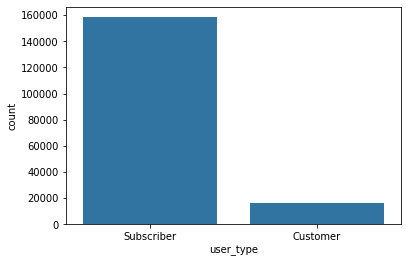

In [ ]:
freq=b['user_type'].value_counts()
sb.countplot(data=b,x='user_type',color=base_color,order=freq.index)
# the number of the subscriber are more than the customers 

In [ ]:
b['Age'].value_counts()

34     10214
29      9323
33      8967
32      8640
31      8484
       ...  
94         1
144        1
92         1
112        1
95         1
Name: Age, Length: 75, dtype: int64

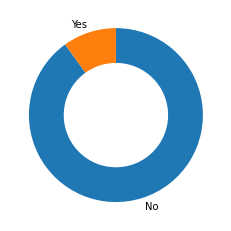

In [ ]:
#freq=b['bike_share_for_all_trip'].value_counts()
#sb.countplot(data=b,x='bike_share_for_all_trip',color=base_color,order=freq.index)

sorted_counts = b['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});

Text(0, 0.5, 'Count')

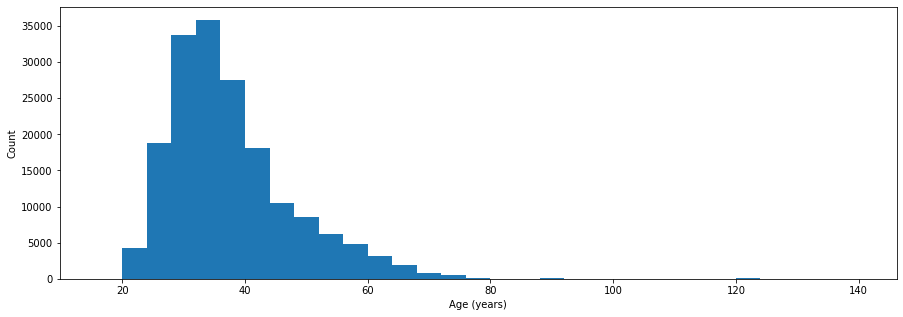

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
bins=np.arange(b['Age'].min()-5,b['Age'].max(),4)
ax.hist(data=b,x='Age',bins=bins)
plt.xlabel('Age (years)')
plt.ylabel('Count')

## the common age in our case is between 24-44
# the curve here is right skwed and there are some outliers 

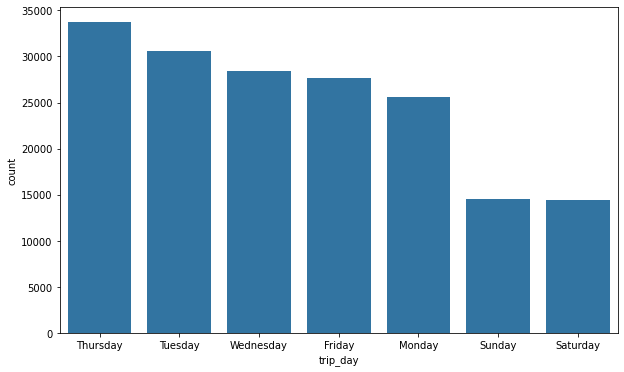

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
freq=b['trip_day'].value_counts()
sb.countplot(data=b,x='trip_day',color=base_color,order=freq.index,ax=ax)
# weekend have the lowest rides but Most rides were taken on Thursdays and Tuesdays

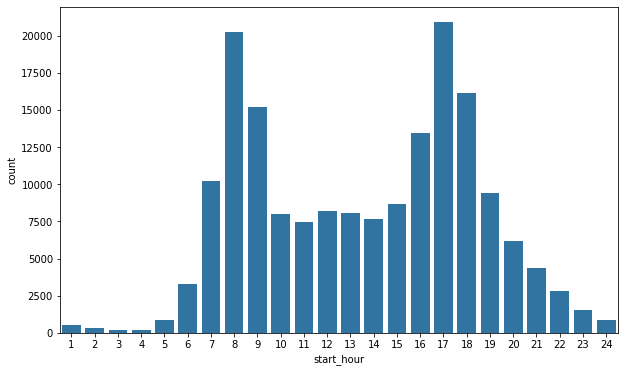

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sb.countplot(data=b,x='start_hour',color=base_color,ax=ax)
# most of the rides at 8 and 17 (we have two peaks)

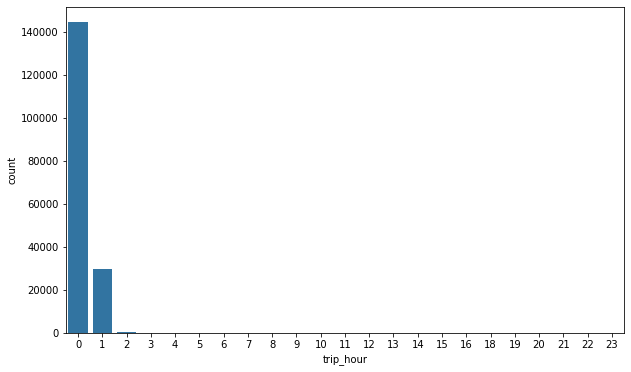

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sb.countplot(data=b,x='trip_hour',color=base_color,ax=ax)
# most of the trips are less than one hour


### the features 

> - the distribution of start hour is bimodel showing that most of the rides at 8 and 17 (we have two peaks)
> - most of users are male , subscribers and didn't share the bike 
> - weekend have the lowest rides but Most rides were taken on Thursdays and Tuesdays
> - the common age in our case is between 24-44
> - removed all null values and convert start and end hours to datetime and calculate the age  

## Bivariate Exploration


# week days vs duration 

In [ ]:
b['duration_sec'].unique()

array([52185, 61854, 36490, ...,  2780,  5713,  2822])

(0.0, 3000.0)

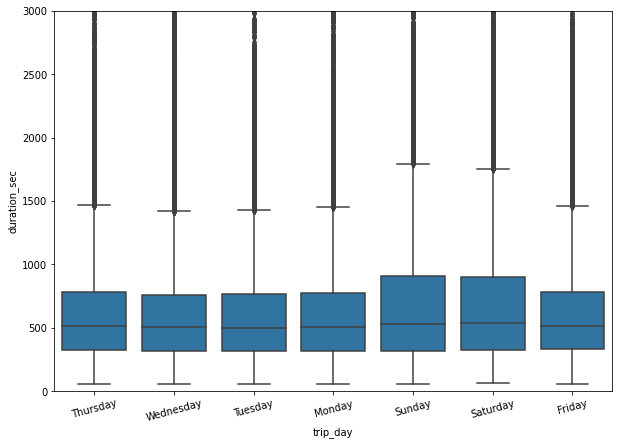

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
bas_color=sb.color_palette()[0]
sb.boxplot(data=b,x='trip_day',y='duration_sec',color=bas_color,ax=ax)
plt.xticks(rotation = 15);
plt.ylim(0,3000)

## saturday and sunday take a longer trip duration (weekday)

# Age vs duration

(20.0, 100.0)

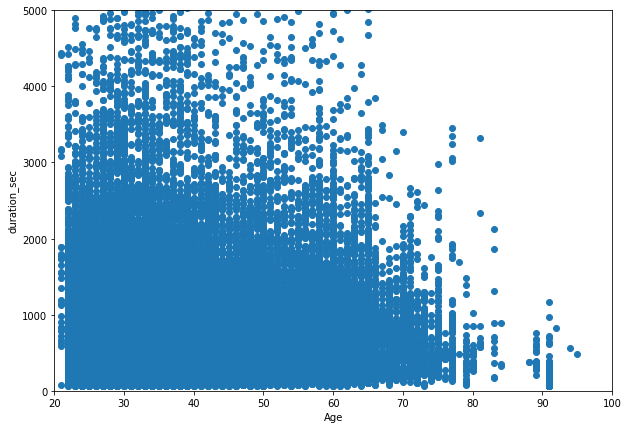

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
plt.scatter(data = b, x = 'Age', y = 'duration_sec');
plt.xlabel('Age')
plt.ylabel('duration_sec')
plt.ylim(0,5000)
plt.xlim(20,100)

# when Age increase then the duration decrease (Negative relation)

# user_type vs duration

(0.0, 3000.0)

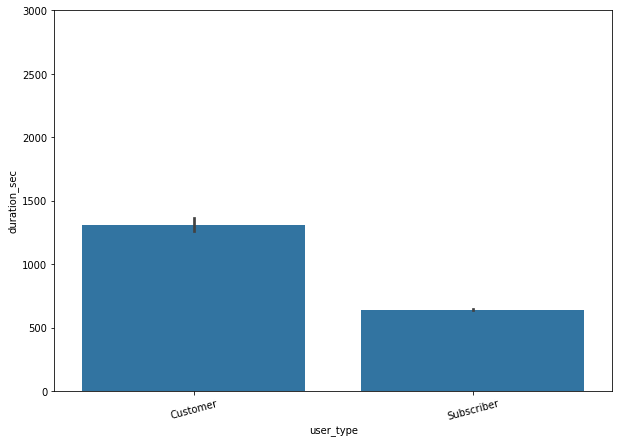

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
bas_color=sb.color_palette()[0]
sb.barplot(data=b,x='user_type',y='duration_sec',color=bas_color,ax=ax)
plt.xticks(rotation = 15);
plt.ylim(0,3000)

## the duration taken by customer is longer than the subscriber

### User Types Vs week days

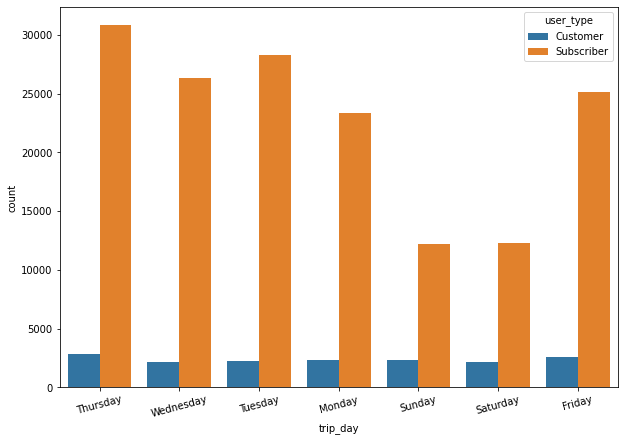

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
sb.countplot(data=b,x='trip_day',hue='user_type',ax=ax)
plt.xticks(rotation = 15);

## both the number of customers and subscriber are very high on thursday 

### User_type Vs Age


(0.0, 50.0)

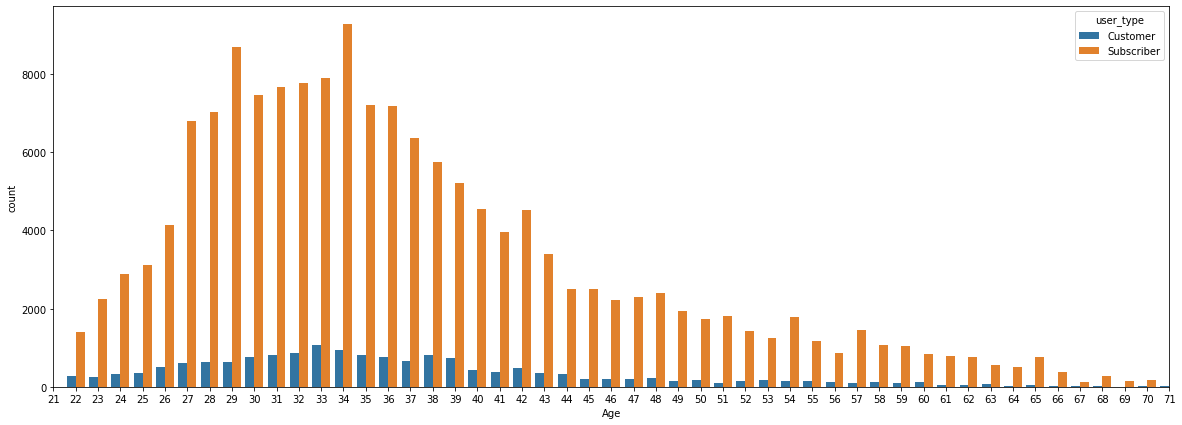

In [ ]:
fig,ax=plt.subplots(figsize=(20,7))
sb.countplot(data=b,x='Age',hue='user_type',ax=ax)
plt.xlim(0,50)

# nothing new the common age is between 24-44

### user type VS day hours
> - The most rides are in 8 am and 17 pm.

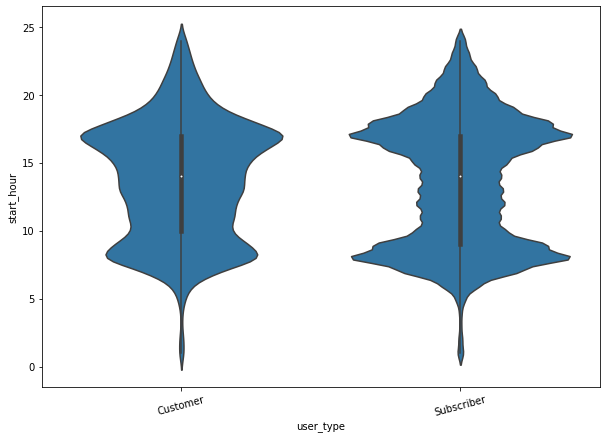

In [ ]:
ig,ax=plt.subplots(figsize=(10,7))
bas_color=sb.color_palette()[0]
sb.violinplot(data=b,x='user_type',y='start_hour',color=bas_color,ax=ax)
plt.xticks(rotation = 15);

# The most rides are in 8 am and 17 pm for both customer and subscriber 

#user type VS share

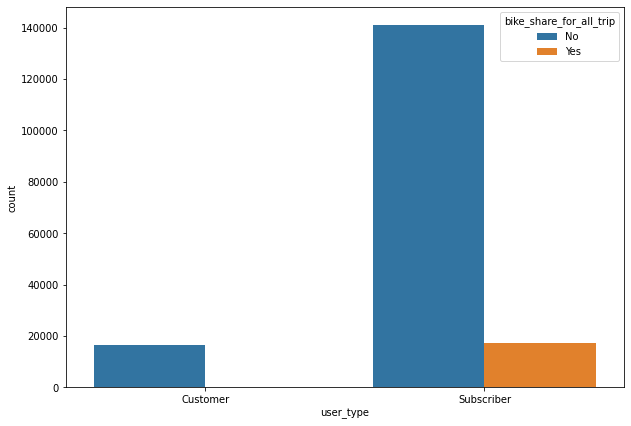

In [ ]:
ig,ax=plt.subplots(figsize=(10,7))
sb.countplot(data=b,x='user_type',hue='bike_share_for_all_trip',ax=ax)

# it is not allowed for customer to share the same bike 